Website Performance Analysis

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#import dataset from csv file
df = pd.read_csv("website performance analysis.csv",header = 1)
df

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3178,Unassigned,2024043005,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3179,Unassigned,2024043006,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3180,Unassigned,2024050105,0,1,0,0.000000,0.000000,2.000000,0.000000,2


Data Cleaning.

In [20]:
#change the cloumn names
df.columns = ['channel group','DateHour','Users','Sessions','Engaged sessions','Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate','Event count']
df

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3178,Unassigned,2024043005,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3179,Unassigned,2024043006,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3180,Unassigned,2024050105,0,1,0,0.000000,0.000000,2.000000,0.000000,2


In [21]:
#change the dtypes of columns.
df['DateHour'] = pd.to_datetime(df['DateHour'], format ='%Y%m%d%H',errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
dtypes: datetime6

In [23]:
#add new columns for hours.
df["Hour"] = df["DateHour"].dt.hour

In [24]:
df

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


In [25]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


### Questions

1. What patterns or trends can you observe in website sessions and uers over time.

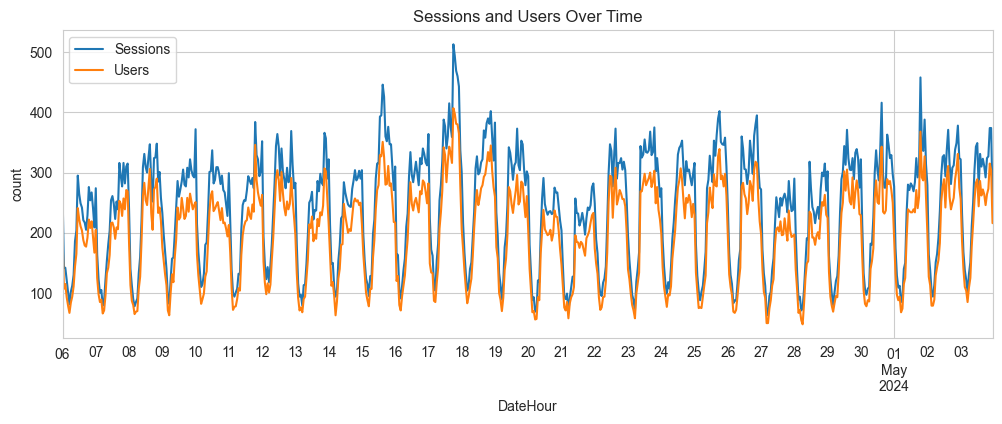

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,4))
df.groupby('DateHour')[['Sessions','Users']].sum().plot(ax = plt.gca())
plt.title('Sessions and Users Over Time')
plt.xlabel('DateHour')
plt.ylabel('count')
plt.show()

2. Which marketing channel brought the highest number of users to the website and how can we use this insight to improve traffic from other sourses.

In [27]:
print(df['channel group'].value_counts())

channel group
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64


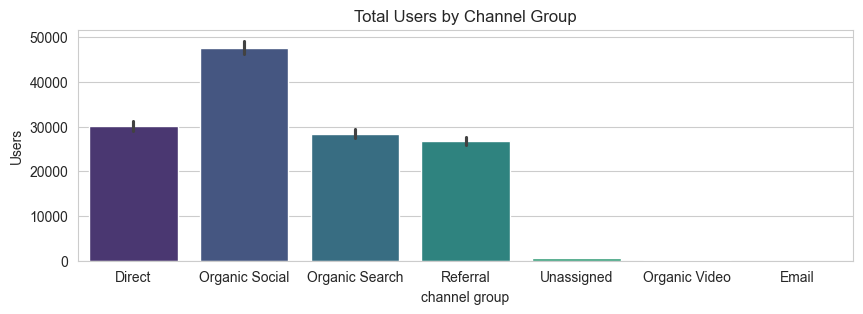

In [63]:
plt.figure(figsize = (10,3))
sns.barplot(data = df, x = 'channel group',estimator=np.sum, y = 'Users', palette='viridis',hue = 'channel group')
plt.title('Total Users by Channel Group')
plt.savefig('total_users_by_channel_group.png',dpi = 300)
plt.show()

3. Which channel has the highest average engagement time and what does that tell us about user behaviour and content effectiveness?

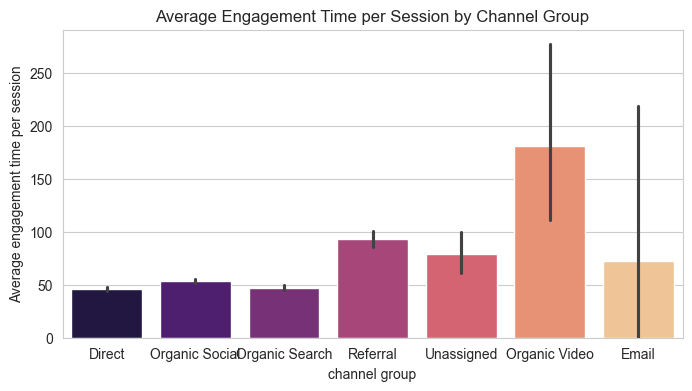

In [33]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x = 'channel group',y  = 'Average engagement time per session',hue='channel group', estimator=np.mean, palette='magma')
plt.title('Average Engagement Time per Session by Channel Group')
plt.show()

4. How does engagement rate vary across different traffic channels?

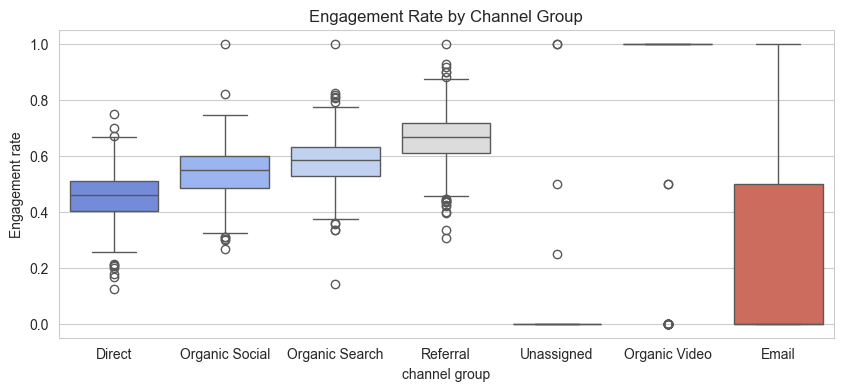

In [37]:
plt.figure(figsize= (10,4))
sns.boxplot(data = df , x = 'channel group', y = 'Engagement rate', palette='coolwarm',hue='channel group')
plt.title('Engagement Rate by Channel Group')
plt.show()

5. Which channels are driving more engaged sessions compared to non-engaged ones and what stratesgies can improve engagement in underperforming channels.

In [38]:
df

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


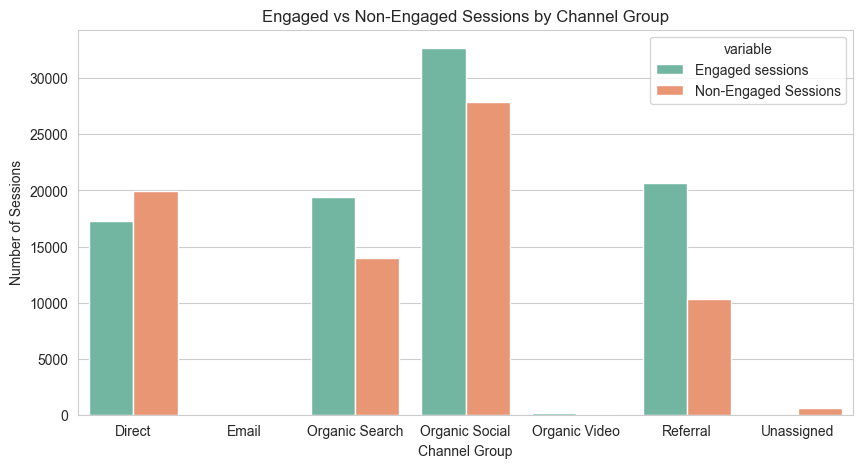

In [44]:
s_df = df.groupby("channel group")[['Sessions','Engaged sessions']].sum().reset_index()
s_df["Non-Engaged Sessions"] = s_df["Sessions"] - s_df["Engaged sessions"]
s_df_M = s_df.melt(id_vars="channel group", value_vars=["Engaged sessions", "Non-Engaged Sessions"])

plt.figure(figsize = (10,5))
sns.barplot(data=s_df_M, x="channel group", y="value", hue="variable", palette="Set2")
plt.title("Engaged vs Non-Engaged Sessions by Channel Group")
plt.xlabel("Channel Group") 
plt.ylabel("Number of Sessions")    
plt.show()

6. At What Hours of the day does each channel drive the most traffic?

In [45]:
df

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


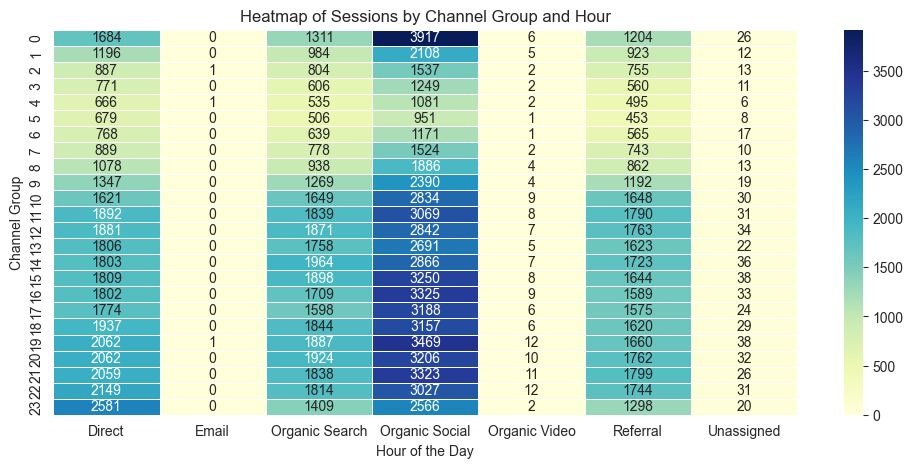

In [52]:
ht_data = df.groupby(['Hour','channel group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize = (12,5))
sns.heatmap(ht_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap of Sessions by Channel Group and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Channel Group') 
plt.show()


7. is there any correlation between high traffic(sessions) and high engagement rate over time?

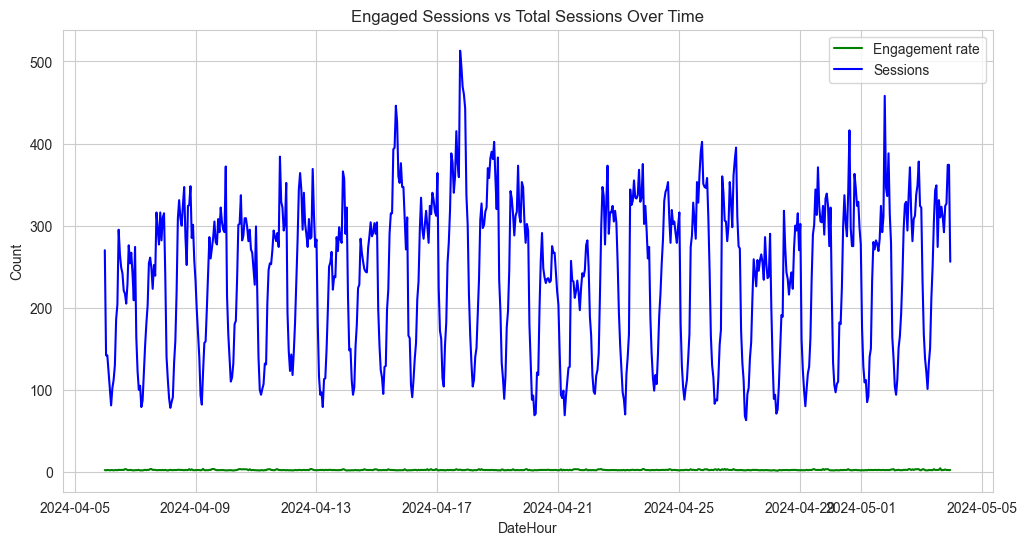

In [58]:
df_plot = df.groupby('DateHour')[['Engagement rate','Sessions']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_plot['DateHour'], df_plot['Engagement rate'], label='Engagement rate', color='green')
plt.plot(df_plot['DateHour'], df_plot['Sessions'], label='Sessions', color='blue')
plt.title('Engaged Sessions vs Total Sessions Over Time')
plt.xlabel('DateHour')
plt.ylabel('Count')
plt.legend()
plt.show()